In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

mpl.rcdefaults() 
# %matplotlib inline

size = 14
mpl.rcParams['lines.linewidth'] = 5
mpl.rcParams['lines.markersize'] = 14
mpl.rcParams['font.size'] = size
mpl.rcParams['xtick.labelsize'] = size
mpl.rcParams['legend.fontsize'] = size
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.5
mpl.rcParams['figure.figsize'] = [8, 6]

# Take a glimbse into our data
##### There are 31 features. We don't know the name of features $V_1$ to $V_{28}$ due to the privacy of cardholders. Indeed, we don't have access to the original data and these features are obtained after running PCA on original data which is a dimentionality reduction method. These features are the first 28th principal components of the original data.

In [3]:
data = pd.read_csv('creditcard.csv')
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


#### Column names:

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### File size. It is good to know that there is no null value in our data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

##### Feature Amount shows the amount of a transaction, and feature Time for a particular transaction shows the time elapsed between the first transaction and this transaction. Our goal is to predict feature class. It is $0$ if the transaction is not a fraud, otherwise it is $1$.

#### Here we show some stastistics of these three columns:

In [7]:
data[['Time', 'Amount', 'Class']].describe(include='all')

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


#### Here we plot the distribution of classes. It shows the data is hugely imbalanced!

Labels distribution:
0    284315
1       492
Name: Class, dtype: int64
99.827% of transactions are sincere and 0.173% of them are fraud.


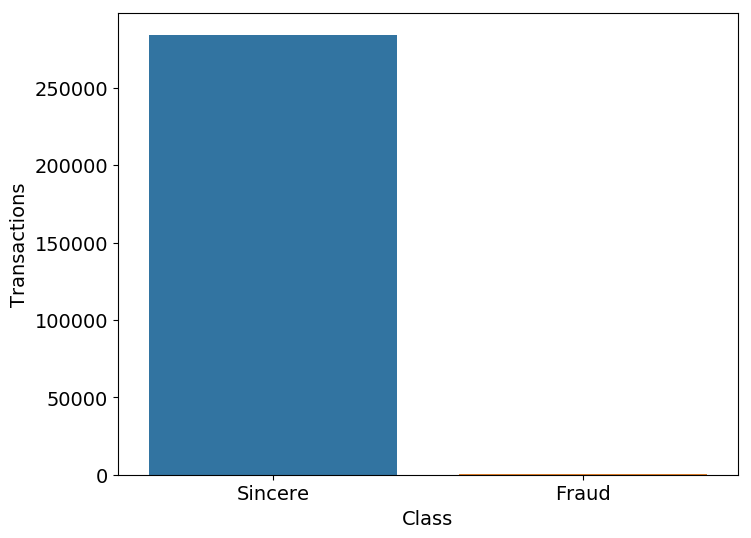

In [31]:
def plot_class_distribution(data):
    sns.countplot('Class', data=data)
    plt.ylabel('Transactions')
    plt.xticks([0, 1], ['Sincere', 'Fraud'])

sincere = len(data[data['Class'] == 0])
fraud = len(data) - sincere 
total_transactions = len(data)
print('Labels distribution:\n{}'.format(data['Class'].value_counts()))
print('{:.3%} of transactions are sincere and {:.3%} of them are fraud.'.format(sincere / total_transactions, fraud / total_transactions))
plot_class_distribution(data)

#### Distribution of Time and Amount:

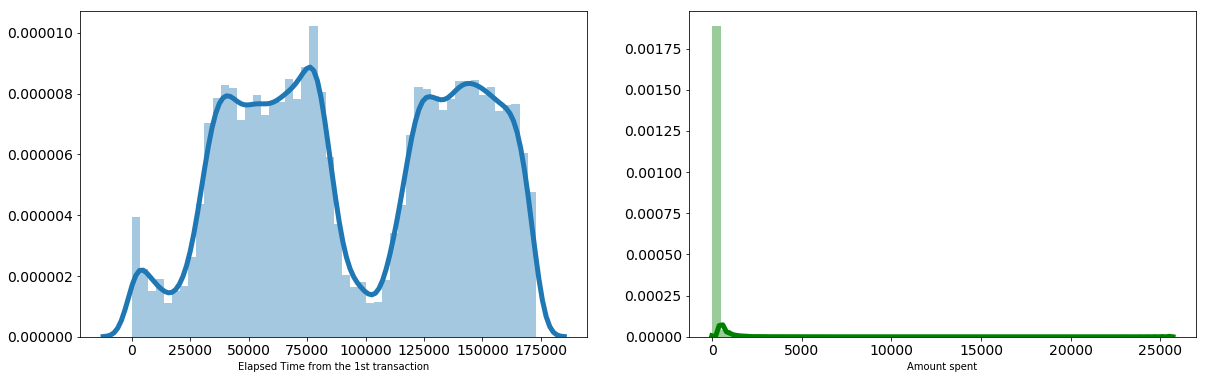

In [9]:
def plot_time_amount(time_name, amount_name, data):    
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    sns.distplot(data[time_name], ax=ax[0])
    sns.distplot(data[amount_name], ax=ax[1], color='green')
    ax[0].set_xlabel('Elapsed Time from the 1st transaction' )
    ax[1].set_xlabel('Amount spent')
plot_time_amount('Time', 'Amount', data)

#### Since the range of both Time and Amount is too much, we scale both of these features.

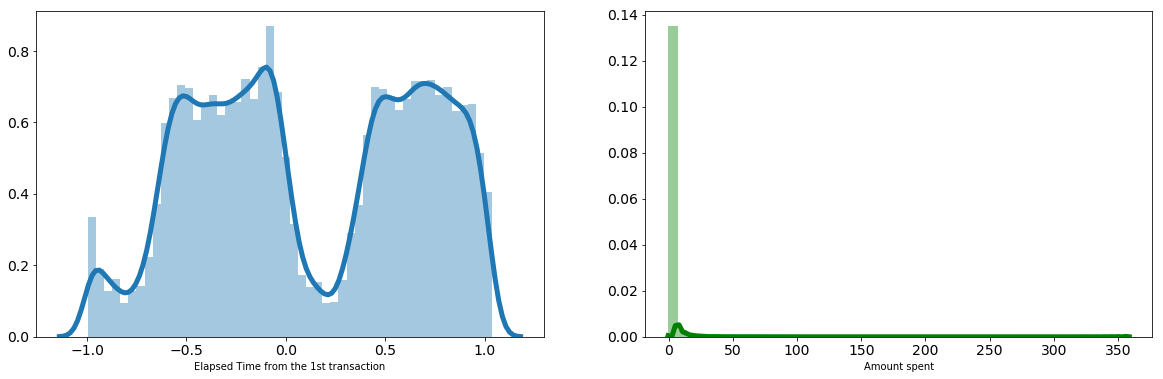

In [10]:
rb_scaler = RobustScaler() # good for handling outliers
data['normalized_time'] = rb_scaler.fit_transform(data['Time'].values.reshape(-1, 1))
data['normalized_amount'] = rb_scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data = data[[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 
       'Time', 'Amount', 'normalized_time', 'normalized_amount', 'Class']]
plot_time_amount('normalized_time', 'normalized_amount', data)

##### To tackle imbalancing in data, we do undersampling in such a way that sincere transactions are sub-sampled. Obviously, it is not a panacea! We lose lots of data as we shrink data from 284407 samples to 984. However, we try to use this method in a more sophisticated way in future.

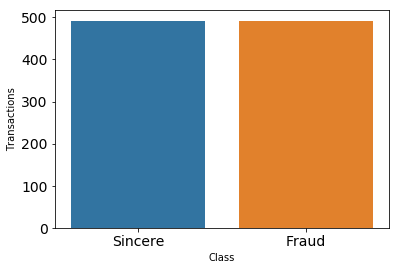

In [11]:
def balance(data):
    sincere = data[data['Class'] == 0]
    fraud = data[data['Class'] == 1]
    sincere = sincere.sample(frac=1)
    sincere = sincere[: len(fraud)]
    balanced_data = sincere.append(fraud, ignore_index=True)
    balanced_data = balanced_data.sample(frac=1)
    return balanced_data

balanced_data = balance(data)
plot_class_distribution(balanced_data)

##### Here, we show the correlation among features. Note that every time, we call function _sampled_balanced_data_, we get a different balanced data. Therefore, We ran function _correlation_matrix_ a couple of times to show the robustness in the result of correlation among features of different balanced data.

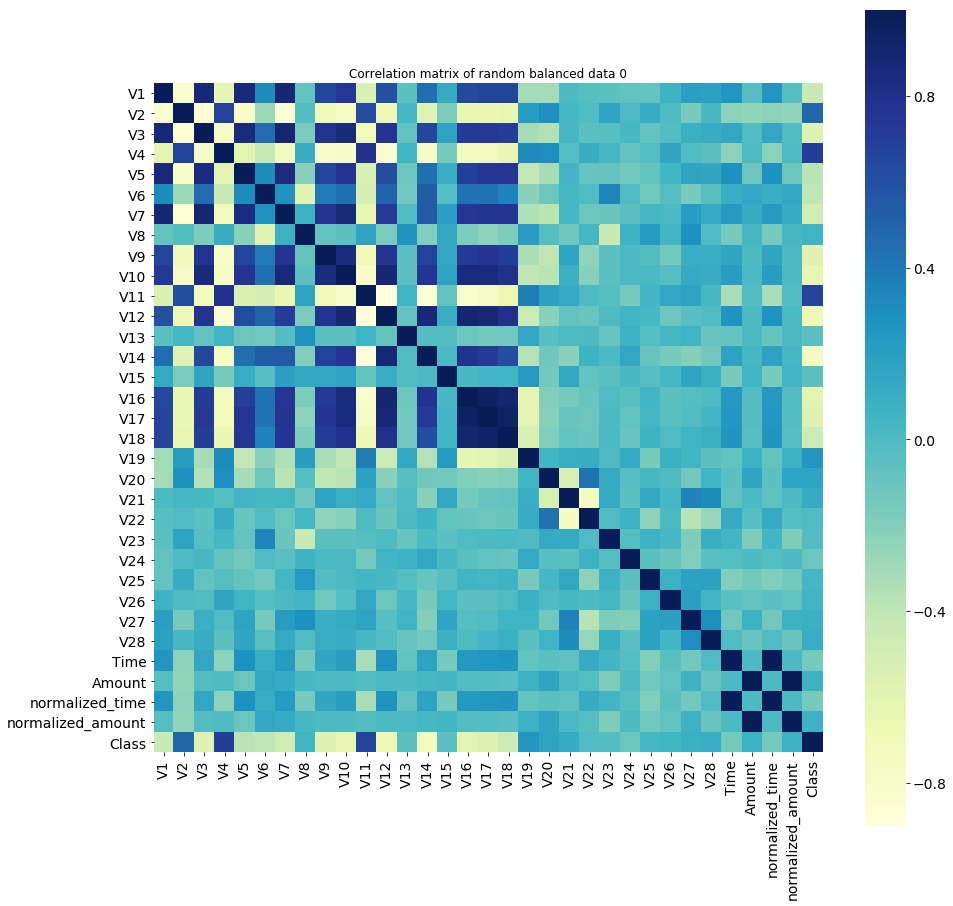

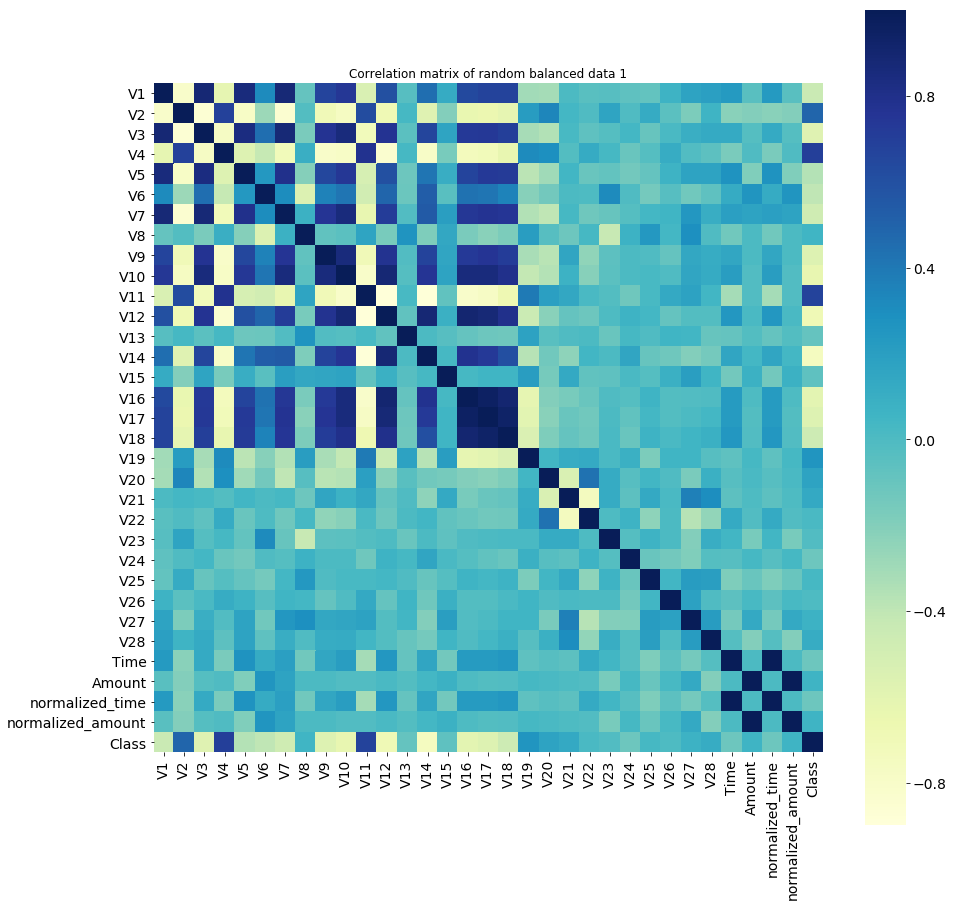

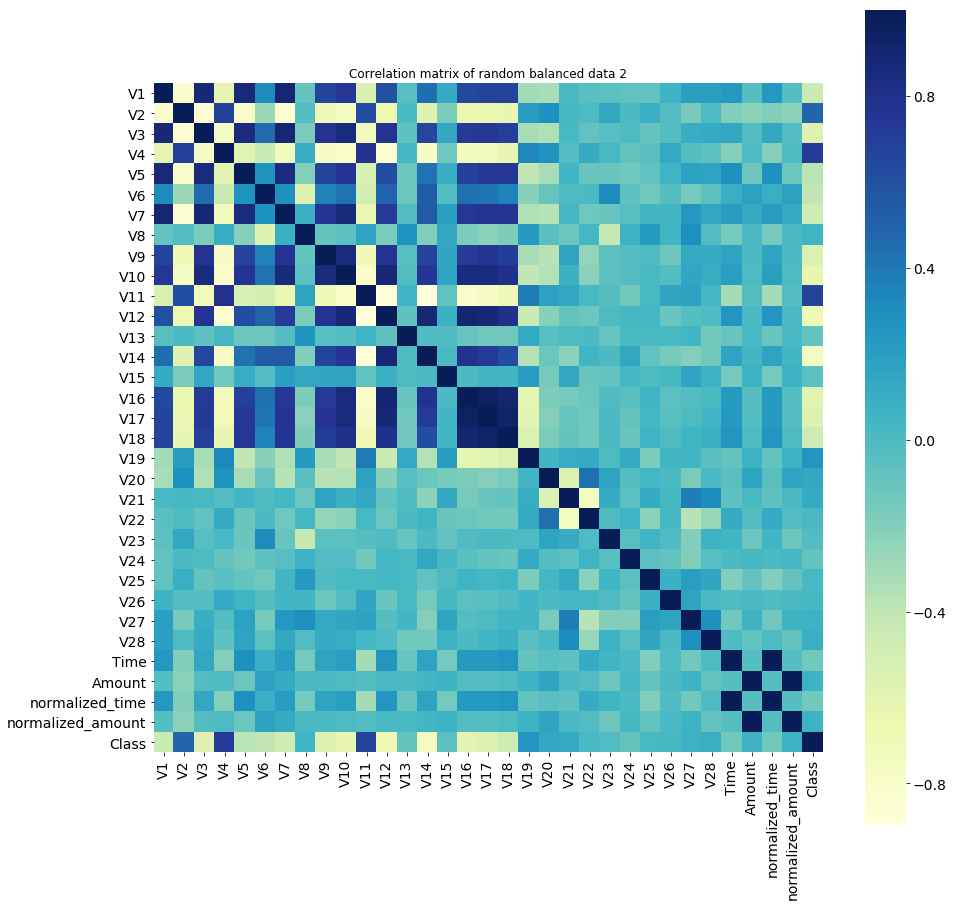

In [12]:
def correlation_matrix(data, text='Correlation matrix'):
    fig = plt.figure(figsize=(15, 15))
    cm = data.corr()
    sns.heatmap(cm, cmap='YlGnBu', square=True)
    plt.title(text)
    plt.show()
    
for itr in range(3):
    sample_balanced_data = balance(data)
    correlation_matrix(sample_balanced_data, text='Correlation matrix of random balanced data {}'.format(itr))

##### Here we show the correlation of features with column Class (our target). Features V3, V4, V11, V14, and V17, to name a few, show a high (negative/positive) correlation with Class. It is a good news! because a model can decide a transaction is fraud or sincere based on these good (correlated) features. 

In [16]:
def correlation_with_class(data, col_fig = 4):  
    n_col = len(balanced_data.columns) - 1 # -1 for ignoring class feature
    row_fig = (n_col + col_fig - 1) // col_fig 
    figs, axes = plt.subplots(row_fig, col_fig, figsize=(30, 60))
    axes = axes.flat
    for idx, col in enumerate(balanced_data.columns[:-1]): # do not plot feature 'Class'
        sns.boxplot(x='Class', y=col, data=balanced_data, ax=axes[idx])
        axes[idx].set_title('Feature {}'.format(col))

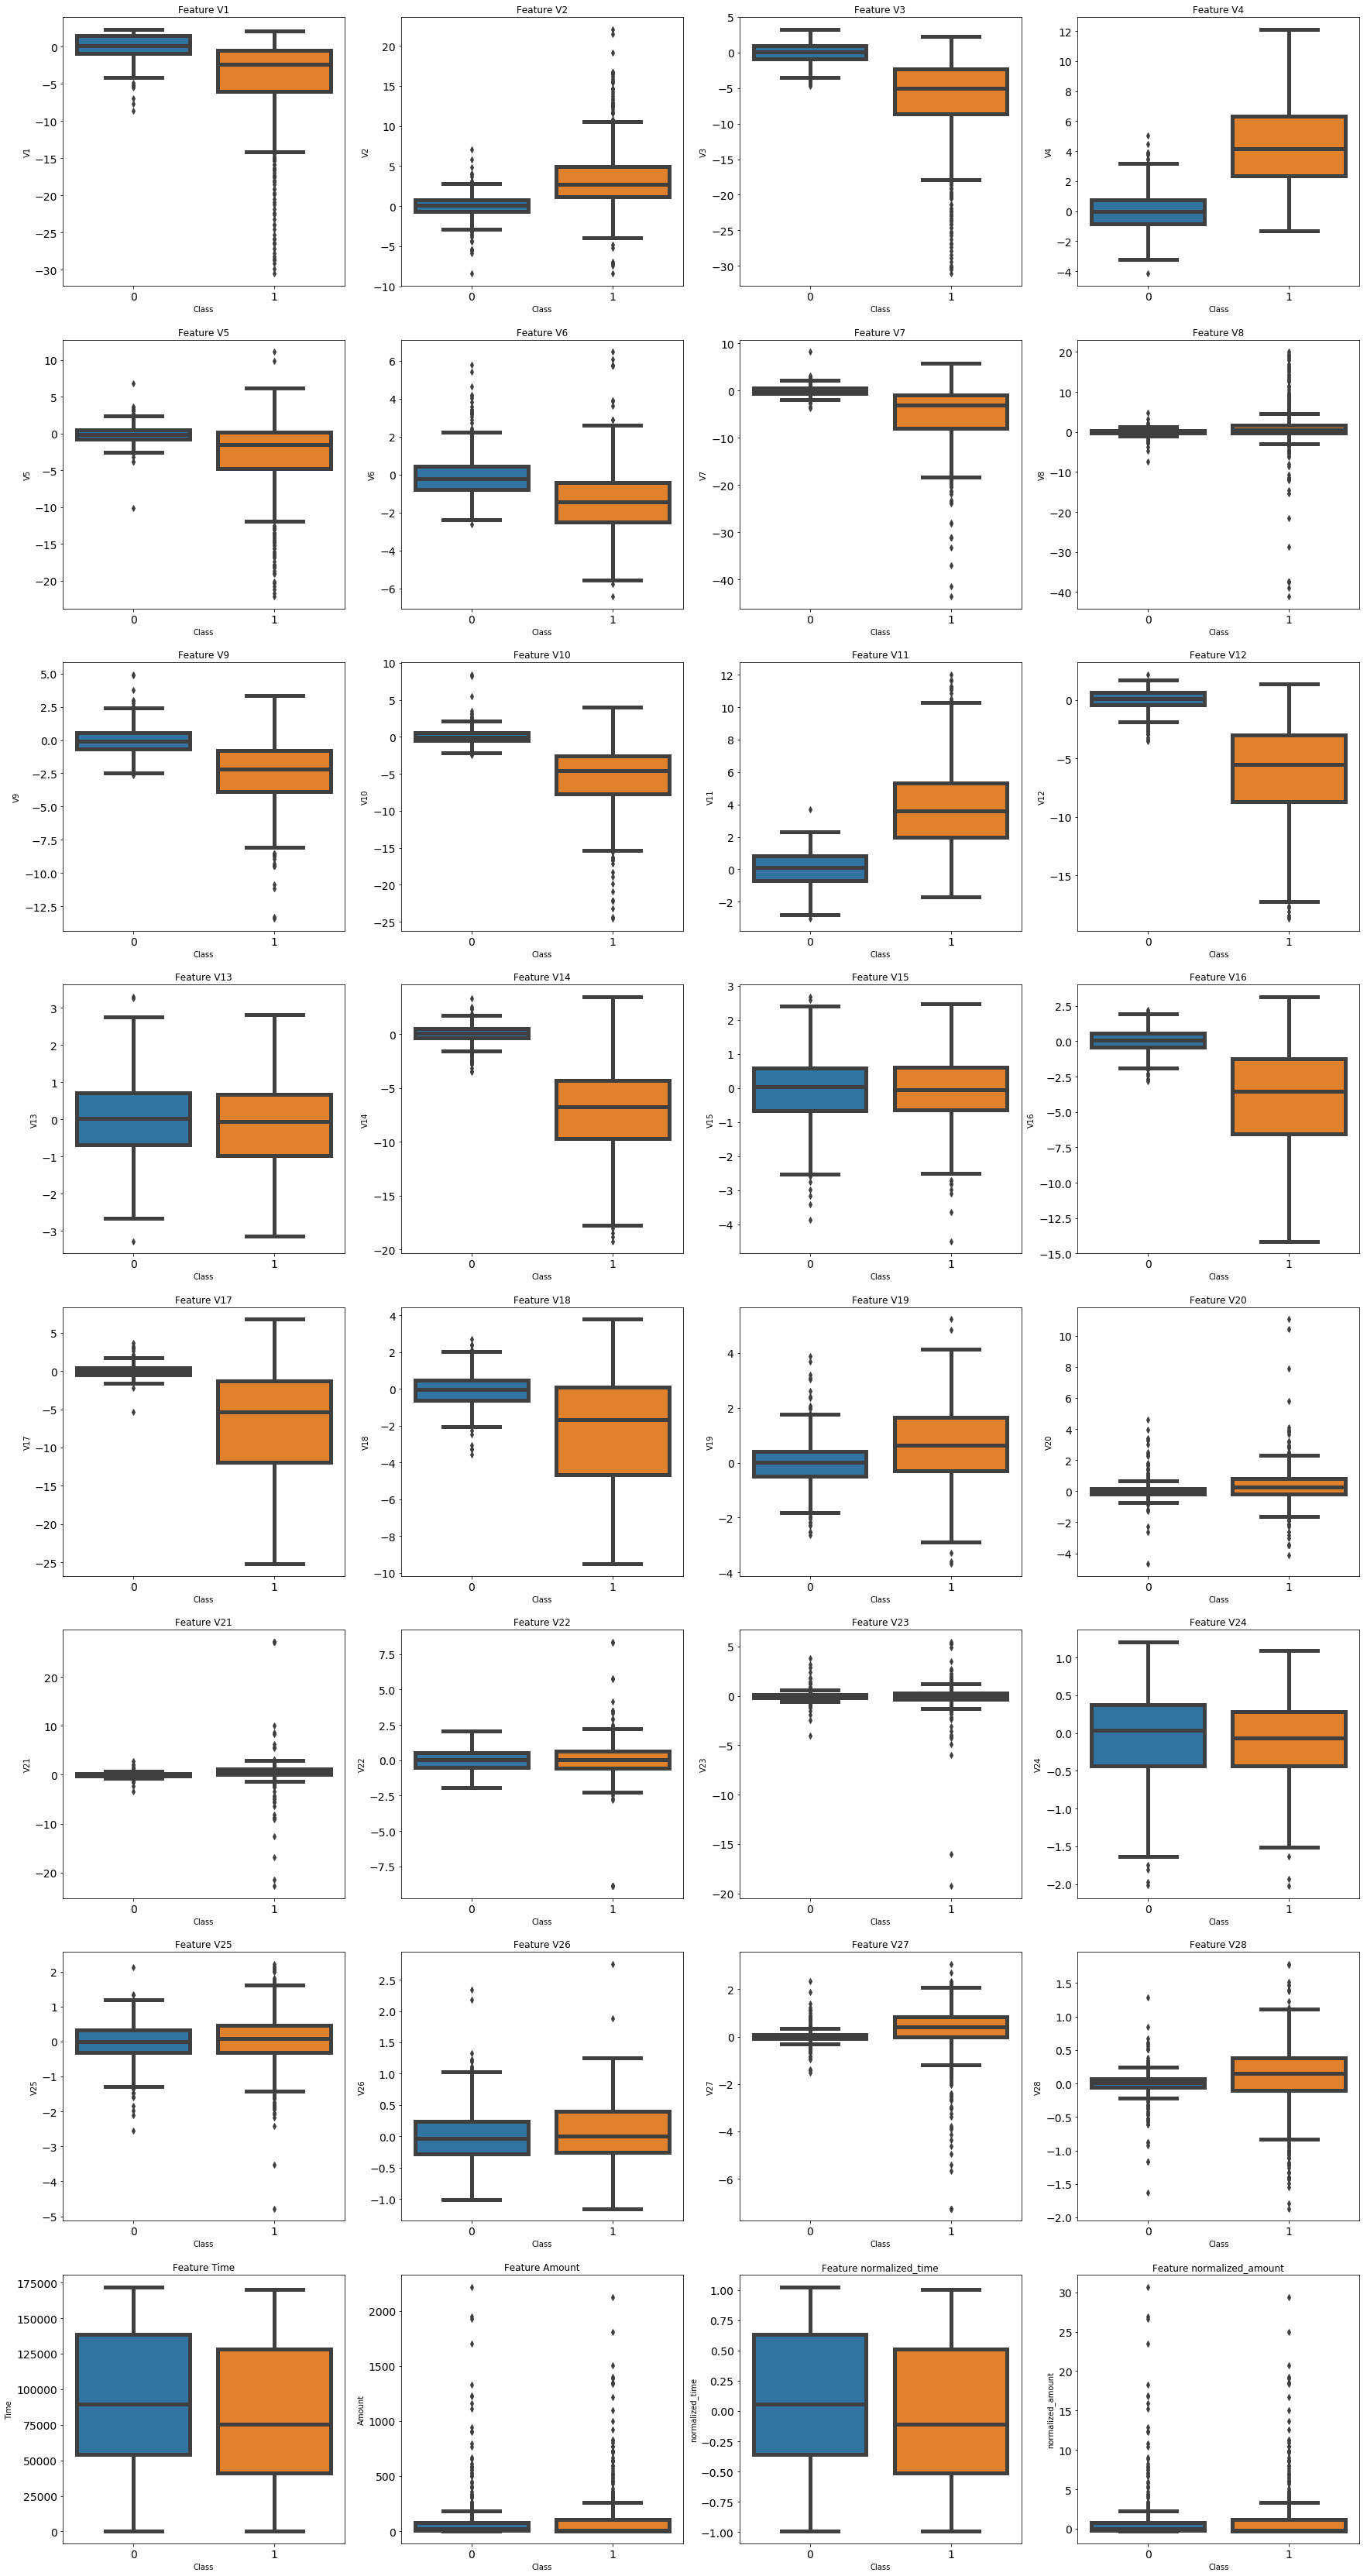

In [15]:
correlation_with_class(balanced_data)

# Naive Model
##### Here we run a naive model on our balanced data. We ran Support Vector Classifier as our naive method, and we are going to outperfom this method with more sophisticated algorithms in next steps.

In [25]:
def naive_model(X_train, y_train, X_test, y_test, model, random_state=42):
    classifier = model(kernel='linear', random_state=random_state)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cm, cmap='Greens', annot=True, square=True, xticklabels=['Sincere', 'Fraud'], yticklabels=['Sincere', 'Fraud'])
    ax.set_xlabel('Predicted Transaction')
    ax.set_ylabel('Truth Transaction')
    print(classification_report(y_test, y_pred))
    correct = np.sum(np.equal(y_pred, y_test))
    print('{} corrects out of {} test samples'.format(correct, len(y_test)))
    print('Accuracy: {:.2%}'.format(correct / len(y_test)))

In [27]:
X_blc = balanced_data.drop(columns='Class')
y_blc = balanced_data['Class']
X_blc_train, X_blc_test, y_blc_train, y_blc_test = train_test_split(X_blc, y_blc, test_size=0.2, random_state=42)

             precision    recall  f1-score   support

          0       0.89      0.97      0.93       104
          1       0.96      0.86      0.91        93

avg / total       0.92      0.92      0.92       197

181 corrects out of 197 test samples
Accuracy: 91.88%


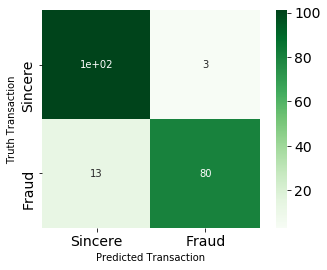

In [28]:
naive_model(X_blc_train, y_blc_train, X_blc_test, y_blc_test, SVC)